In [ ]:
# %% Deep learning - Section 7.48
#    Learning rate comparison

# This code pertains a deep learning course provided by Mike X. Cohen on Udemy:
#   > https://www.udemy.com/course/deeplearning_x
# The "base" code in this repository is adapted (with very minor modifications)
# from code developed by the course instructor (Mike X. Cohen), while the
# "exercises" and the "code challenges" contain more original solutions and
# creative input from my side. If you are interested in DL (and if you are
# reading this statement, chances are that you are), go check out the course, it
# is singularly good.


In [ ]:
# %% Libraries and modules
import numpy               as np
import matplotlib.pyplot   as plt
import torch
import torch.nn            as nn
import copy

from google.colab                     import files
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


In [ ]:
# %% Data

nClust = 100
blur   = 1

A = [1,1]
B = [5,1]

a = [ A[0]+np.random.randn(nClust)*blur, A[1]+np.random.randn(nClust)*blur ]
b = [ B[0]+np.random.randn(nClust)*blur, B[1]+np.random.randn(nClust)*blur ]

# True labels
labels_np = np.vstack(( np.zeros((nClust,1)), np.ones((nClust,1)) ))

# Concatenate
data_np = np.hstack((a,b)).T

# Convert into torch tensor
data   = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


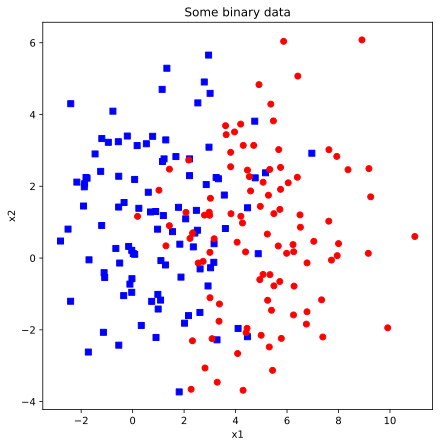

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting

fig = plt.figure(figsize=(7,7))

plt.plot( data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs' )
plt.plot( data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro' )
plt.title('Some binary data')
plt.xlabel('x1')
plt.ylabel('x2')

plt.savefig('figure24_learning_rates.png')

plt.show()

files.download('figure24_learning_rates.png')


In [ ]:
# %% Functions


In [ ]:
# %% Function to build the model

def gen_model(learning_rate):

    # Model architecture
    ANNclassify = nn.Sequential(
                     nn.Linear(2,1),   # input layer (num inputs, num outputs)
                     nn.ReLU(),        # first activation function
                     nn.Linear(1,1),   # output layer (num inputs, num outputs)
                     #nn.Sigmoid()     # second activation function (not needed here bc. we use BCEWithLogitsLoss)
                     )

    # Loss function
    loss_fun = nn.BCEWithLogitsLoss()

    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learning_rate)

    # Outputs
    return ANNclassify,loss_fun,optimizer


In [ ]:
# %% Function to train the model

num_epochs = 1000

def train_model(ANNmodel):

    # Inizialise losses
    losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch_i in range(num_epochs):

        # Forward propagation
        yHat = ANNmodel(data)

        # Compute loss
        loss = loss_fun(yHat,labels)
        losses[epoch_i] = loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass
    predictions = ANNmodel(data)

    # Prediction and accuracy (predictions>0 bc. the sigmoid is run internally to the loss function)
    tot_acc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,tot_acc


In [ ]:
# %% Run the code once

# Generate model
ANNclassify,loss_fun,optimizer = gen_model(0.01)

# Train model
losses,predictions,tot_acc = train_model(ANNclassify)

# Report accuracy
print(f'Final accuracy: {tot_acc}%')


Final accuracy: 81.0%


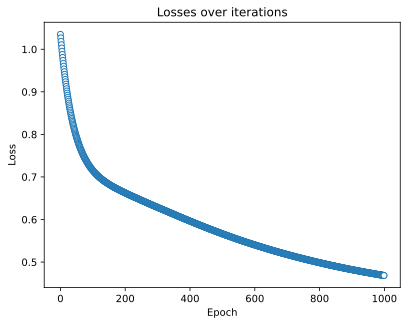

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses over iterations')

plt.savefig('figure25_learning_rates.png')

plt.show()

files.download('figure25_learning_rates.png')


In [ ]:
# %% Parametric experiment on learning rates

# Parameters
learning_rates   = np.linspace(.001,.1,40)
acc_by_learnRate = []
all_losses       = np.zeros( (len(learning_rates),num_epochs) )

# Loop through learning rates
for i,lr in enumerate(learning_rates):

    # Generate and run the model
    ANNclassify,lossfun,optimizer = gen_model(lr)
    losses,predictions,tot_acc    = train_model(ANNclassify)

    # Store results
    acc_by_learnRate.append(tot_acc)
    all_losses[i,:] = losses.detach()


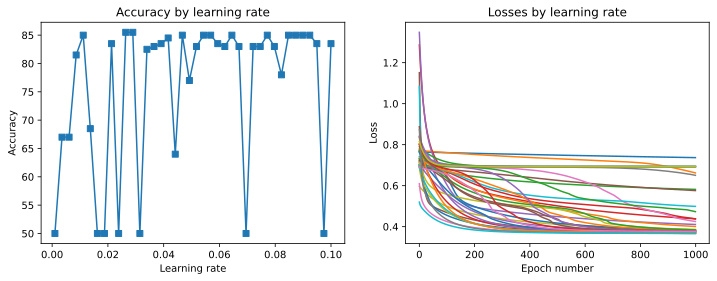

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learning_rates,acc_by_learnRate,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_losses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

plt.savefig('figure26_learning_rates.png')

plt.show()

files.download('figure26_learning_rates.png')


In [ ]:
# %% Proportion of runs where the model had at least 70% accuracy

sum(torch.tensor(acc_by_learnRate)>70)  / len(acc_by_learnRate)


tensor(0.7250)

In [ ]:
# %% Meta-parametric experiment on learning rates
#    Repeat the above experiment 50 times per learning rate

# takes around 10 mins to run

# Parameters (reduce epochs for computation time)
num_exps       = 50
learning_rates = np.linspace(.001,.1,40)
accuracies     = np.zeros( (num_exps,len(learning_rates)) )
num_epochs     = 500

# Loop through experiments and learning rates
for exp_i in range(num_exps):

    for i,lr in enumerate(learning_rates):

        # Generate and run the model
        ANNclassify,lossfun,optimizer = gen_model(lr)
        losses,predictions,tot_acc    = train_model(ANNclassify)

        # Store results
        accuracies[exp_i,i] = tot_acc


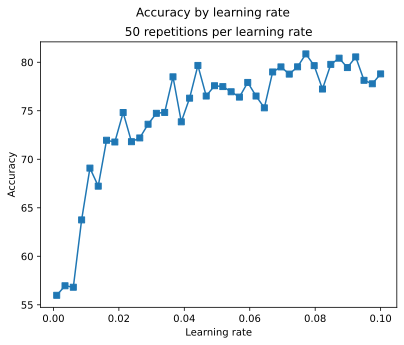

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting

plt.plot(learning_rates,np.mean(accuracies,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.suptitle('Accuracy by learning rate')
plt.title('50 repetitions per learning rate')

plt.savefig('figure27_learning_rates.png')

plt.show()

files.download('figure27_learning_rates.png')


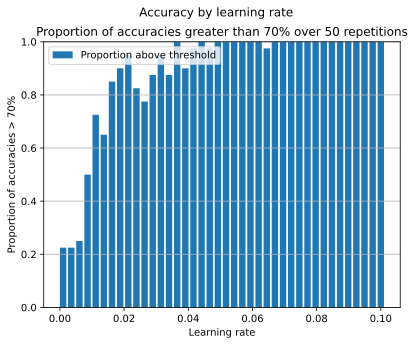

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# %% Exercise 1
#    The mean of a set of numbers is easily interpretable only if the data are roughly normally or uniformly distributed
#    (see lecture "Mean and variance" in Math section). Do you think the mean is a valid description of the performance
#    of the model's accuracy in the meta-experiment? Use a different metric (e.g., one we discussed in this video!) and
#    plot that result on the same graph as the average. You might need to do some normalization to get them in the same
#    range. Does this alternative method lead to a different conclusion?

# First some variance visualisation
avg_accuracies = np.mean(accuracies,axis=0)
std_accuracies = np.std(accuracies,axis=0)

plt.errorbar(learning_rates,avg_accuracies,yerr=np.std(accuracies, axis=0),fmt='s-',capsize=5,label="Mean ± Std")

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.suptitle('Accuracy by learning rate')
plt.title('50 repetitions per learning rate')
plt.legend()

plt.savefig('figure28_learning_rates_extra1.png')

plt.show()

files.download('figure28_learning_rates_extra1.png')

# Use accuracy trheshold instead
acc_above_thresh = (torch.tensor(accuracies)>70).sum(dim=0) / accuracies.shape[1]

plt.bar(learning_rates,acc_above_thresh,width=0.002,label='Proportion above threshold')
plt.xlabel('Learning rate')
plt.ylabel('Proportion of accuracies > 70%')
plt.suptitle('Accuracy by learning rate')
plt.title('Proportion of accuracies greater than 70% over 50 repetitions')
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y')

plt.savefig('figure29_learning_rates_extra1.png')

plt.show()

files.download('figure29_learning_rates_extra1.png')


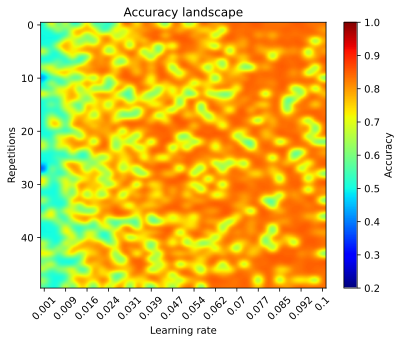

In [ ]:
# %% Exercise 2
#    Related to the previous comment, perhaps showing an image of the performance (variable accMeta) would be more
#    appropriate. Create a heat map that shows learning rate on the x-axis, experiment repetitions on the y-axis, and
#    the final accuracy in color. Label the axes and specify suitable color boundaries.

plt.imshow((accuracies/100),aspect='auto',cmap='jet',interpolation='bicubic',vmin=0.2,vmax=1)

selected_ticks  = np.arange(0,len(learning_rates),3)
selected_labels = np.round(learning_rates[selected_ticks],3)
plt.xticks(ticks=selected_ticks,labels=selected_labels,rotation=45)

plt.colorbar(label='Accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Repetitions')
plt.title('Accuracy landscape')

plt.savefig('figure30_learning_rates_extra2.png')

plt.show()

files.download('figure30_learning_rates_extra2.png')


In [ ]:
# %% Exercise 3
#    The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
#    Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
#    successfully learned to categorize the two conditions?

# Intuitively, reducing the blur to 0.5 should increase the performace but it does't, it actually makes it worse!
# As mentioned before in the lectures, I suspect it is due to the fact that non-linear solutions are not suited for
# linear problems, and reducing the blur indeed makes this problem more linear (i.e. a line would suffice to separate
# the two groups of data). This observation is somehow backed up by the observation that ingreasing the blur and making the
# problem non-linear, actually stabilize the performace of the model much more (see the proportion graph). The overall
# performance is lower that the standard case of blur = 1, but the model could arguably be improved with more epochs.
# Bottom line, DL models do good with non-linear problems, which is what they are designed for.
